In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [196]:
data=pd.read_csv('/content/drive/My Drive/project/Dataset/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [198]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [199]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [200]:
data.shape

(398, 9)

In [201]:
data.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [202]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [204]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

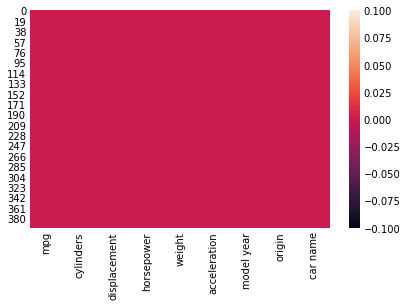

In [205]:
sns.heatmap(data.isnull())

In [206]:
data = data[data.horsepower != '?']
print('?' in data.horsepower)

False


In [207]:
data.shape

(392, 9)

In [208]:
data["horsepower"] = pd.to_numeric(data["horsepower"])

In [209]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [210]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['car name'], dtype='object')

In [211]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['cylinders', 'horsepower', 'weight', 'model year', 'origin'], dtype='object')

In [212]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['mpg', 'displacement', 'acceleration'], dtype='object')

In [213]:
#Describe the dataset Column Value 
data[Numerical].describe()

,cylinders,horsepower,weight,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,104.469388,2977.584184,75.979592,1.576531
std,1.705783,38.491160,849.402560,3.683737,0.805518
min,3.000000,46.000000,1613.000000,70.000000,1.000000
25%,4.000000,75.000000,2225.250000,73.000000,1.000000
50%,4.000000,93.500000,2803.500000,76.000000,1.000000
75%,8.000000,126.000000,3614.750000,79.000000,2.000000
max,8.000000,230.000000,5140.000000,82.000000,3.000000


In [214]:
#Describe the dataset Column Value 
data[Float].describe()

,mpg,displacement,acceleration
count,392.000000,392.000000,392.000000
mean,23.445918,194.411990,15.541327
std,7.805007,104.644004,2.758864
min,9.000000,68.000000,8.000000
25%,17.000000,105.000000,13.775000
50%,22.750000,151.000000,15.500000
75%,29.000000,275.750000,17.025000
max,46.600000,455.000000,24.800000


In [215]:
data["car name"].value_counts()

amc matador                   5
ford pinto                    5
toyota corolla                5
chevrolet chevette            4
peugeot 504                   4
                             ..
toyota cressida               1
chevrolet monza 2+2           1
plymouth satellite            1
ford granada gl               1
plymouth volare premier v8    1
Name: car name, Length: 301, dtype: int64

In [216]:
model=[]
for x in data["car name"]:
    x = x.split()
    model.append(x[0])

In [217]:
data["manufacturer"] = model

In [218]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [219]:
data["manufacturer"].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
saab              4
opel              4
subaru            4
chevy             3
renault           3
mercedes-benz     2
maxda             2
cadillac          2
bmw               2
mercedes          1
toyouta           1
nissan            1
hi                1
triumph           1
capri             1
chevroelt         1
vokswagen         1
Name: manufacturer, dtype: int64

In [220]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'manufacturer'],
      dtype='object')

In [221]:
brand = data.dropna(subset =["mpg"])
brand = data['manufacturer'].value_counts()[:4]
brand =list(brand.index)

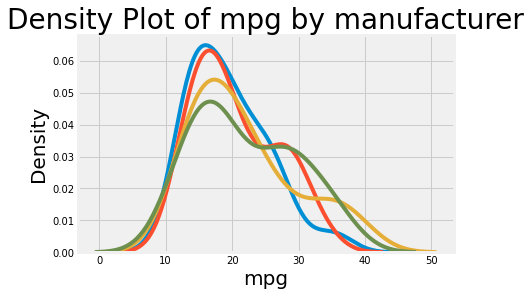

In [222]:
# Plot of distribution of mpg for manufacturer


#figsize(8,8)

# Plot each manufacturer
for c_brand in brand:
    # Select the manufacturer
    subset = data[data['manufacturer'] == c_brand]
    
    # Density plot of mpg
    sns.kdeplot(subset['mpg'].dropna(),
               label = c_brand, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('mpg', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot of mpg by manufacturer', size = 28)
plt.show()

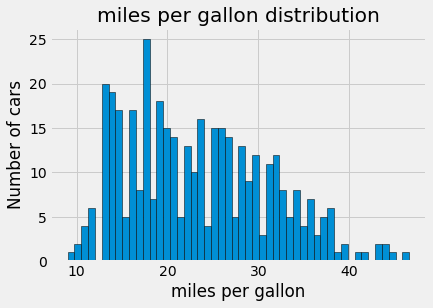

In [223]:

#figsize(8, 8)
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data["mpg"].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('miles per gallon'); plt.ylabel('Number of cars'); 
plt.title('miles per gallon distribution');
plt.show()

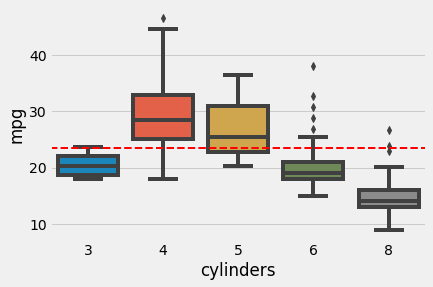

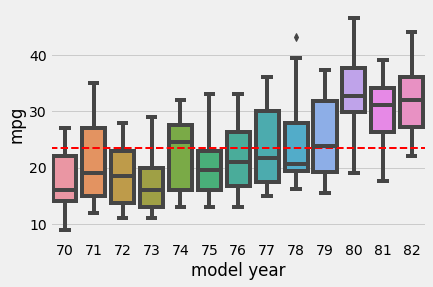

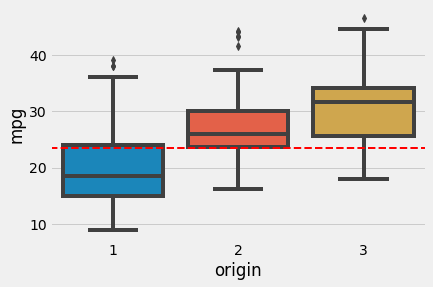

In [224]:
boxplot_vars = ["cylinders", "model year", "origin"]

for var_i in boxplot_vars:
    temp_df_graph = pd.concat([data["mpg"], data[var_i]], axis=1)
    fig = sns.boxplot(x=var_i, y="mpg", data=temp_df_graph)
    plt.axhline(data["mpg"].mean(),color='r',linestyle='dashed',linewidth=2)
    plt.show()
    #fig.figure.savefig("figs/" + var_i + "_box.png")
del temp_df_graph

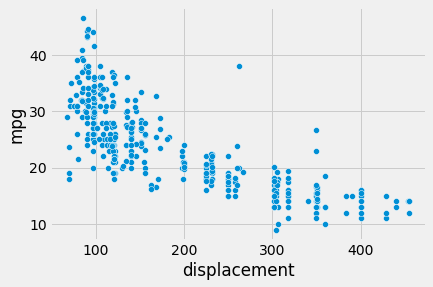

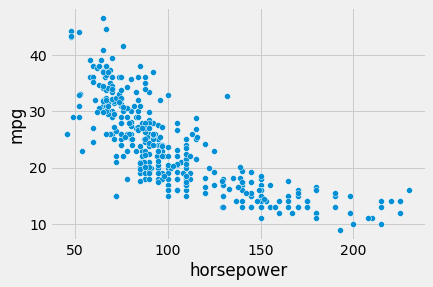

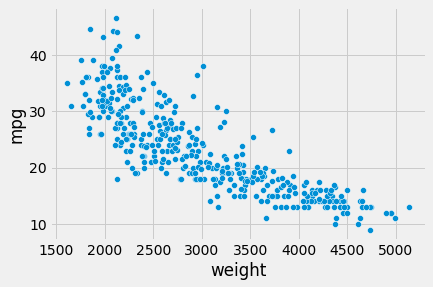

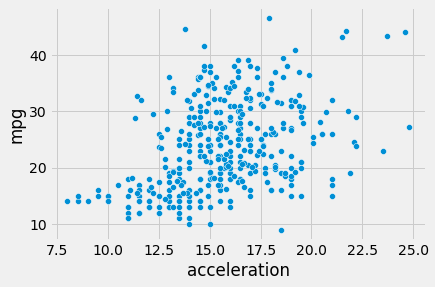

In [225]:
#TEST ASSUMPTION: LINEARITY
#show scatter plots
scatter_vars = ["displacement", "horsepower", "weight", "acceleration"]

#scatter plots against y
for var_i in scatter_vars:
    fig = sns.scatterplot(x=data[var_i], y=data["mpg"])
    plt.show()
    #fig.figure.savefig("figs/" + var_i + "_scatter.png")
    
    
    

# Outliers

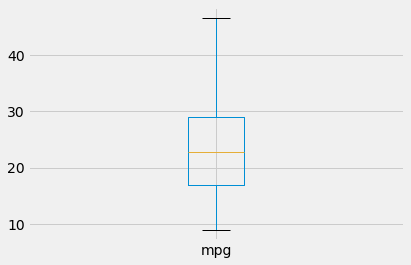

In [226]:
data['mpg'].plot.box()

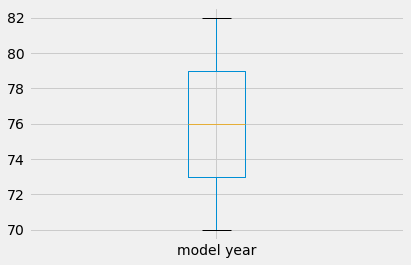

In [227]:
data['model year'].plot.box()

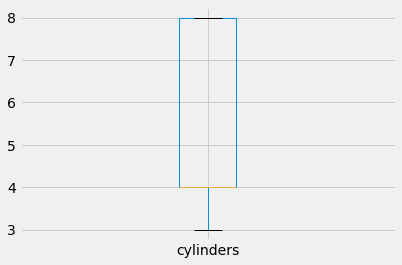

In [228]:
data['cylinders'].plot.box()

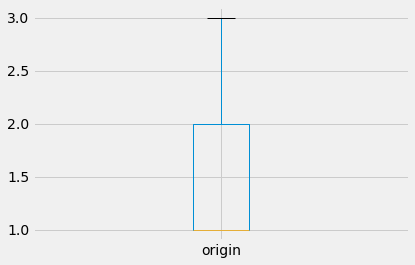

In [229]:
data['origin'].plot.box()

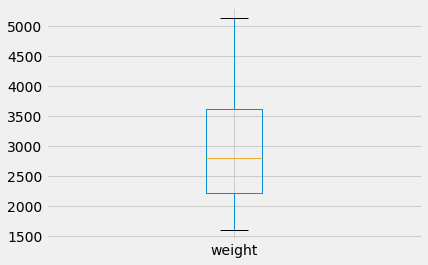

In [230]:
data['weight'].plot.box()

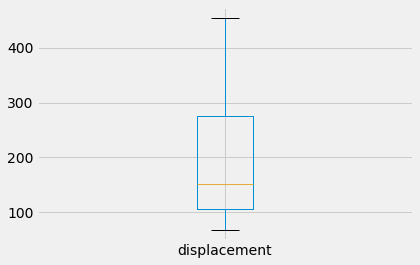

In [231]:
data['displacement'].plot.box()

In [232]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [233]:
from scipy.stats import boxcox

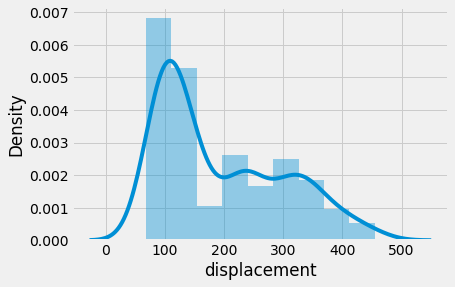

In [234]:
sns.distplot(data['displacement'])

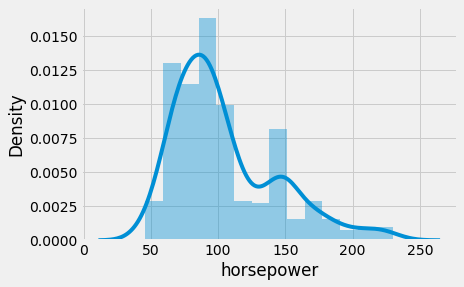

In [235]:
sns.distplot(data['horsepower'])

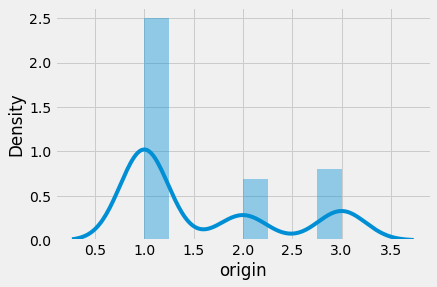

In [236]:
sns.distplot(data['origin'])

In [237]:
data['displacement']=boxcox(data['displacement'],0)
data['origin']=boxcox(data['origin'],0)
data['horsepower']=boxcox(data['horsepower'],0)

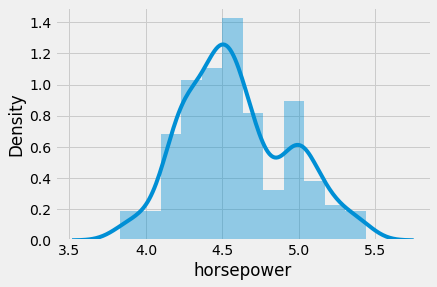

In [238]:
sns.distplot(data['horsepower'])

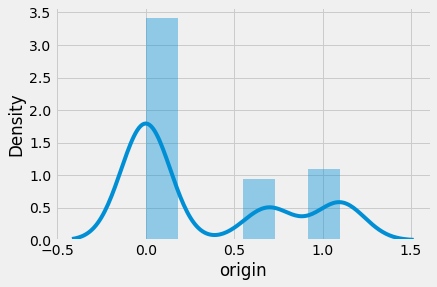

In [239]:
sns.distplot(data['origin'])

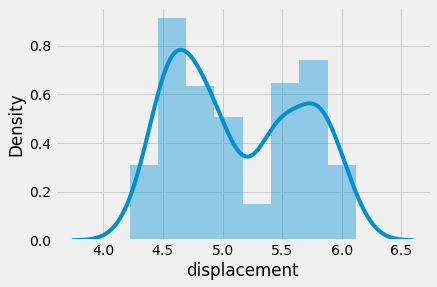

In [240]:
sns.distplot(data['displacement'])

In [241]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.211368
horsepower      0.370148
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.731162
dtype: float64

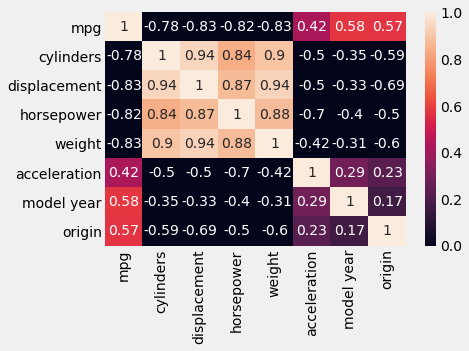

In [242]:
sns.heatmap(data.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [243]:
x=data[['cylinders','displacement','horsepower','weight','acceleration','origin','model year']].copy()
y=data['mpg']

In [244]:
x.shape

(392, 7)

In [245]:
y.shape

(392,)

In [246]:
y=y.values.reshape(-1,1)

In [247]:
y.shape

(392, 1)

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [249]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing dataabs
x_test = norm.transform(x_test)

In [250]:
x_train.shape

(274, 7)

In [251]:
x_test.shape

(118, 7)

In [252]:
y_train.shape

(274, 1)

In [253]:
y_test.shape

(118, 1)

In [254]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [255]:
lr.coef_

array([[  4.25130533,  -8.93540948, -16.59590036,  -7.11540415,
         -7.43178517,   2.05394035,   8.19856513]])

In [256]:
lr.intercept_

array([34.70611709])

In [257]:
lr.score(x_train,y_train)

0.8472638510288105

In [258]:
pred=lr.predict(x_test)

In [259]:
print('prediction of data\n ',pred[:5])

prediction of data
  [[27.28141791]
 [24.66025185]
 [35.36696494]
 [24.77140297]
 [28.53307309]]


In [260]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [261]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 2.505453809292881
mean square error 10.724845336325043
rooot mean square error 3.2748809652146202


In [262]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7972804112812132


In [263]:
import numpy as np
from numpy import *

In [264]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [265]:
y_pred=knn.predict(x_test)#Pred
print(' prediction \n',y_pred[1:5])#print the predicted Value 

 prediction 
 [[25.86]
 [34.42]
 [24.35]
 [27.66]]


In [266]:
knn.score(x_train,y_train)

0.8758906597913456

In [267]:
knn.score(x_test,y_test)

0.8494307634655601

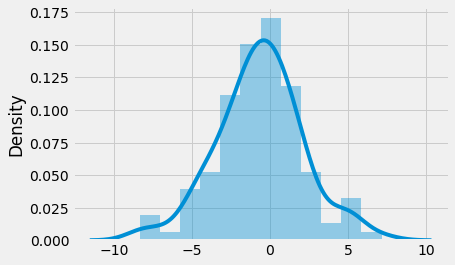

In [268]:
sns.distplot(y_test-y_pred)
plt.show()

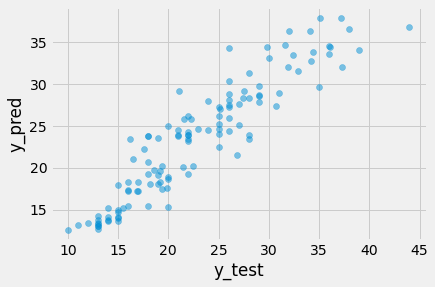

In [269]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [270]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 2.505453809292881
mean square error 10.724845336325043
rooot mean square error 3.2748809652146202


In [271]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7972804112812132


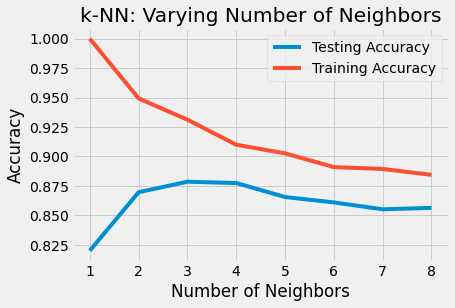

In [272]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsRegressor(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [273]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [274]:
tree.score(x_train,y_train)

1.0

In [275]:
tree.score(x_test,y_test)

0.7698105136810128

In [276]:
y_pred=tree.predict(x_test)#Pred
print(' prediction \n',y_pred[1:5])#print the predicted Value a

 prediction 
 [19. 36. 30. 27.]


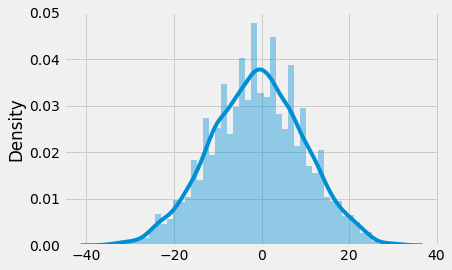

In [277]:
sns.distplot(y_test-y_pred)
plt.show()

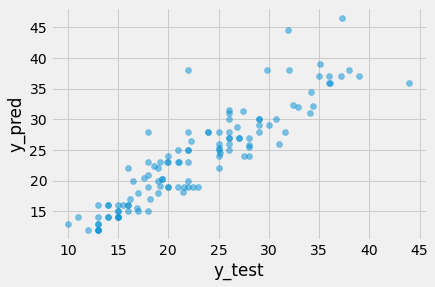

In [278]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [279]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean square error",mean_squared_error(y_test,y_pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,y_pred)))

error
mean absolute error: 2.3762711864406776
mean square error 12.178135593220341
rooot mean square error 3.489718555015625


In [280]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7972804112812132


In [281]:
from sklearn.ensemble import RandomForestRegressor
RR= RandomForestRegressor() #max_leaf_nodes=12 #random_state=1
RR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [282]:
RR.score(x_train,y_train)

0.9816343020668122

In [283]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 2.505453809292881
mean square error 10.724845336325043
rooot mean square error 3.2748809652146202


In [284]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7972804112812132


In [285]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [286]:
score=cross_val_score(lr,x,y,cv=10,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(knn,x,y,cv=5)
print('prediction \n',y_pred[:5])

score of mean 
 -12.066327114455136
score of standard devition 
 6.804338931714008
prediction 
 [[19.2625]
 [17.7625]
 [19.65  ]
 [19.6625]
 [19.05  ]]


In [287]:
from sklearn.externals import joblib
joblib.dump(data,'auto MPG.pkl')

['auto MPG.pkl']